# Алешко Альберт Вариант 1 
# Задание 3

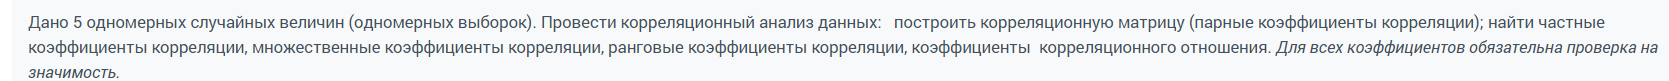

Корреляция - это статистическая мера, используемая для описания степени и направления связи между двумя переменными. Когда две переменные коррелируют, изменения в одной переменной часто сопровождаются изменениями в другой переменной.

Основные типы корреляции:

Положительная корреляция: Если значения одной переменной увеличиваются, то значения другой переменной также увеличиваются. Коэффициент корреляции ближе к 1 в этом случае.

Отрицательная корреляция: Если значения одной переменной увеличиваются, то значения другой переменной уменьшаются. Коэффициент корреляции ближе к -1 в этом случае.

Нулевая корреляция: Отсутствие связи между переменными. Коэффициент корреляции близок к 0.

Для измерения степени корреляции часто используются различные коэффициенты корреляции, такие как:

Коэффициент корреляции Пирсона: Измеряет линейную связь между двумя непрерывными переменными. Он принимает значения от -1 до 1, где 1 указывает на полную положительную линейную корреляцию, -1 - на полную отрицательную корреляцию, а 0 - на отсутствие линейной связи.

Коэффициент корреляции Спирмена (ранговая): Эти коэффициенты используются для измерения монотонной связи между переменными, то есть связи, которая не обязательно является линейной. Они часто используются для ранжированных или порядковых данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr
import pingouin as pg
import tqdm
from statsmodels.formula.api import ols
plt.style.use('Solarize_Light2') # Функция для задания стиля графикам

In [14]:
sheet_name = '2-1'
# sheet_name = '1вар-адекв'
data = pd.read_excel('data2.xlsx', sheet_name=sheet_name, 
                     header=None, names=['var1', 'var2', 'var3', 'var4', 'var5']) # читаем из файла все выборки 
data# выводим их

,var1,var2,var3,var4,var5
0,13.576533,8.444634,42.737,7.574,2.369
1,9.988142,13.552947,23.261,1.660,6.072
2,8.190783,14.466266,13.439,-5.422,3.504
3,8.412009,10.531638,15.174,-5.483,4.532
4,10.021344,8.826599,24.573,3.247,7.447
5,6.843471,7.619135,13.896,-5.045,7.473
6,12.588240,9.044741,31.656,4.941,3.230
7,5.860016,6.764138,9.851,-9.953,6.228
8,11.176900,10.191905,29.845,0.698,1.476
9,12.874558,10.269014,36.838,-1.033,-4.573


In [3]:
length = len(data.T)

In [4]:
def get_correlation(df, corr_func):
    names = df.columns
    correlation = np.zeros((length, length))
    correlation[range(length), range(length)] = 1
    p_values = np.zeros((length, length))
    p_values[range(length), range(length)] = 1

    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            res = corr_func(df[names[i]], df[names[j]])
            correlation[i, j] = correlation[j, i] = res[0]
            p_values[i, j] = p_values[j, i] = res[1]
    df_correlation = pd.DataFrame(correlation)
    df_p_values = pd.DataFrame(p_values)
    df_correlation.columns = df_p_values.columns = names
    df_correlation.index = df_p_values.index = names
    
    return df_correlation, df_p_values

In [5]:
corr, p_vals = get_correlation(data, pearsonr)

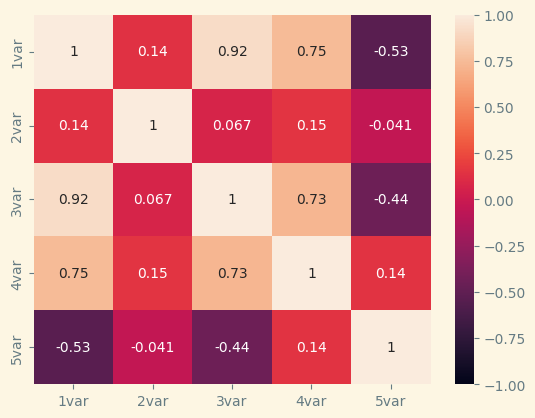

In [6]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

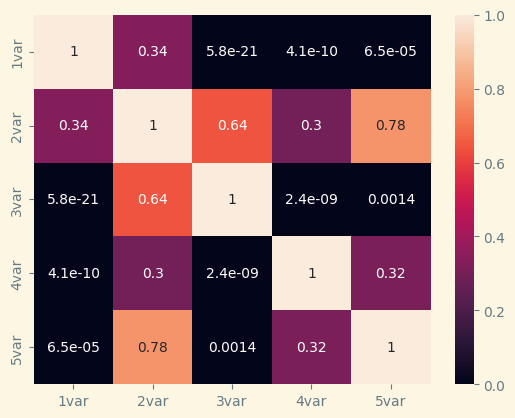

In [7]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [8]:
def get_part_corr(df):
    names = df.columns
    correlation = np.zeros((length, length))
    correlation[range(length), range(length)] = 1
    p_values = np.zeros((length, length))
    p_values[range(length), range(length)] = 1

    for i in range(len(names)):
        for j in range(i+1, len(names)):
            co_names = list(df.columns)
            co_names.remove(names[i])
            if names[j] in co_names:
                co_names.remove(names[j])
            # print((names[i],names[j]),co_names)
            res = pg.partial_corr(data=df, x=names[i], y=names[j], covar=co_names)
            correlation[i, j] = correlation[j, i] = res['r'].iloc[0]
            p_values[i, j] = p_values[j, i] = res['p-val'].iloc[0]
    df_correlation = pd.DataFrame(correlation)
    df_p_values = pd.DataFrame(p_values)
    df_correlation.columns = df_p_values.columns = names
    df_correlation.index = df_p_values.index = names
    
    return df_correlation, df_p_values

In [9]:
# partial_corr = pg.partial_corr(data=data, x='1', y='2', covar=['3','4','5'])
corr_part, p_vals = get_part_corr(data)
# print(partial_corr)

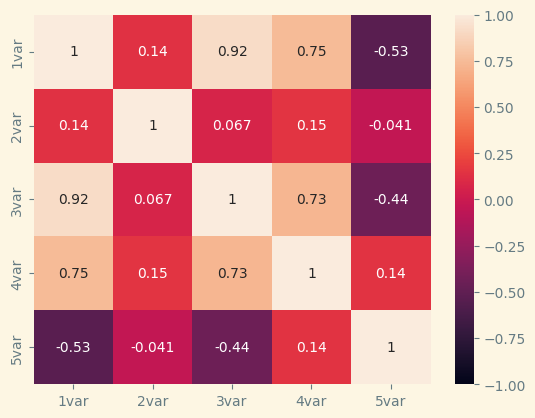

In [10]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

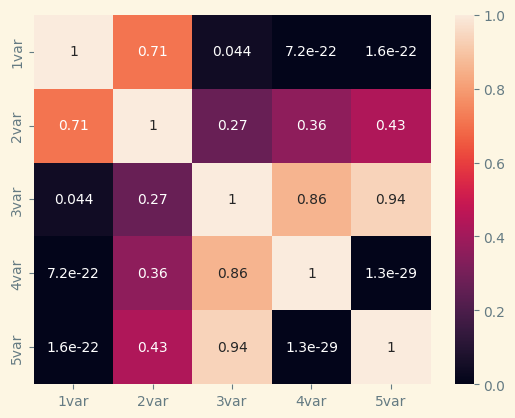

In [11]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [15]:
def multiple_correlation(df):
    names = df.columns
    length = len(names)
    correlation = np.zeros((length))
    p_values = np.zeros((length))
    
    for i, name in enumerate(names):
        formula = name + ' ~ ' + ' + '.join([n for j, n in enumerate(names) if j != i])
        mod = ols(formula=formula, data=df)
        res = mod.fit()
        correlation[i] = res.rsquared ** 0.5
        p_values[i] = res.f_pvalue
    
    return correlation, p_values

In [16]:
corr, p_vals = multiple_correlation(data)

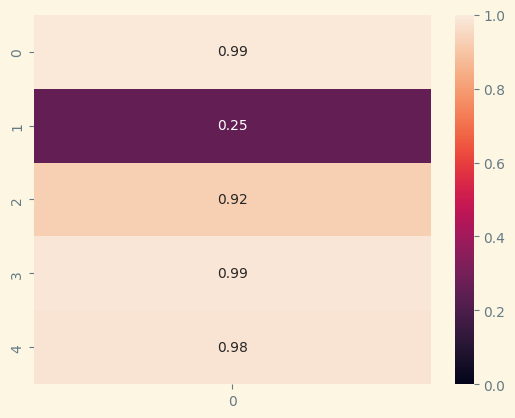

In [17]:
sns.heatmap(corr[..., None], annot=True, vmin=0, vmax=1);

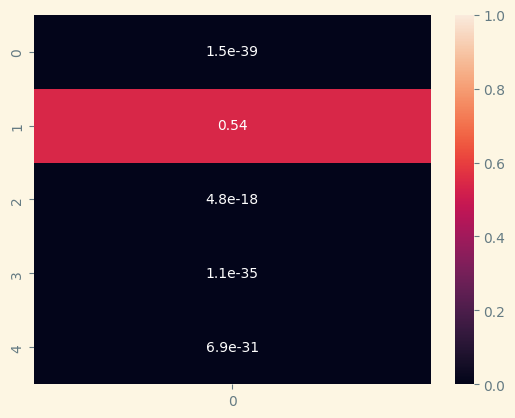

In [18]:
sns.heatmap(p_vals[..., None], annot=True, vmin=0, vmax=1);

In [19]:
corr, p_vals = get_correlation(data, spearmanr)

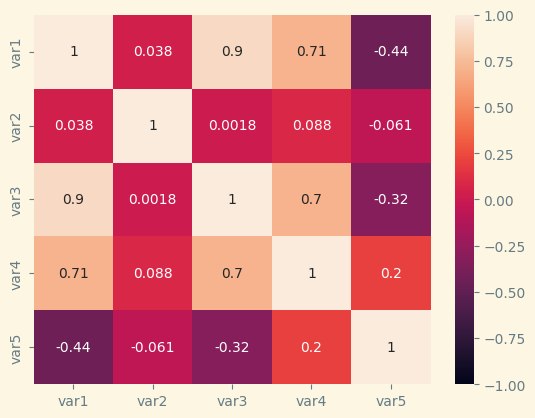

In [20]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

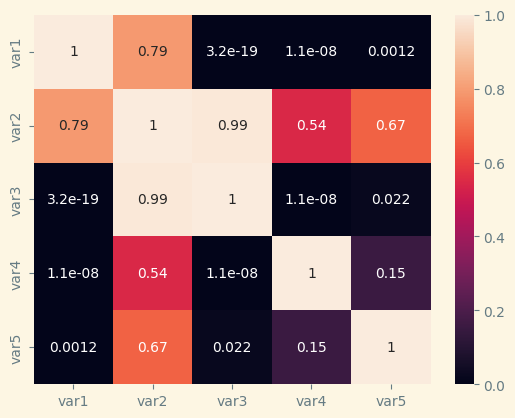

In [21]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);